# Import Python Libraries
The first step involved in Data PreProcessing is understanding and playing around with our data using libraries.
Import all libraries which are required for our analysis, such as Data Loading, Statistical analysis, Visualizations, Data Transformations, Merge and Joins, etc.
->Pandas and Numpy have been used for Data Manipulation and numerical Calculations
->Matplotlib and Seaborn have been used for Data visualizations. 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!matplotlib
import seaborn as sns
import math
import os
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')


Traceback (most recent call last):
  File "C:\Users\khami\anaconda3\Scripts\matplotlib-script.py", line 10, in <module>
    sys.exit(plotting._matplotlib())
             ^^^^^^^^^^^^^^^^^^^^
AttributeError: module 'pandas.plotting' has no attribute '_matplotlib'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Reading Dataset
The Pandas library offers a wide range of possibilities for loading data into the pandas DataFrame from files like JSON, .csv, .xlsx, .sql, .pickle, .html, .txt, images etc.

Most of the data are available in a tabular format of CSV files. It is trendy and easy to access. Using the read_csv() function, data can be converted to a pandas DataFrame.

In [42]:
data = pd.read_csv("D:\\AI Stylish Project\\fashion_dataset\\styles.csv",on_bad_lines='skip')
data

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.00,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.00,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.00,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.00,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.00,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.00,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.00,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.00,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.00,Casual,Rasasi Women Blue Lady Perfume


# Analyzing the Data


In [43]:
data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.00,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.00,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.00,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.00,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.00,Casual,Puma Men Grey T-shirt


In [7]:
data.tail()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.00,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.00,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.00,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.00,Casual,Rasasi Women Blue Lady Perfume
44423,51623,Women,Accessories,Watches,Watches,Pink,Winter,2016.00,Casual,Fossil Women Pink Dial Chronograph Watch ES3050


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [9]:
data.columns

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')

<Axes: >

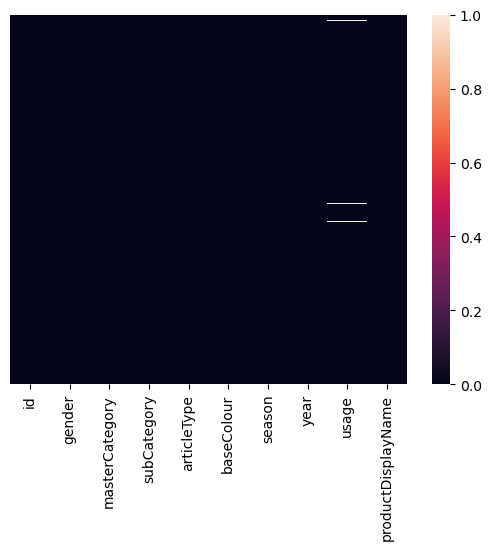

In [10]:
#finding the annoy in graph format
sns.heatmap(data.isnull(),yticklabels=False)

Creating a deep copy of the orginal dataset and label encoding the text data of the categorical features.
Modifications in the original dataset will not be highlighted in this deep copy.
Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['gender'] = le.fit_transform(df1['gender'])
df1['masterCategory'] = le.fit_transform(df1['masterCategory'])
df1['subCategory'] = le.fit_transform(df1['subCategory'])
df1['articleType'] = le.fit_transform(df1['articleType'])
df1['baseColour'] = le.fit_transform(df1['baseColour'])
df1['seson'] = le.fit_transform(df1['season'])
df1['year'] = le.fit_transform(df1['year'])
df1['usage'] = le.fit_transform(df1['usage'])
df1['productDisplayName'] = le.fit_transform(df1['productDisplayName'])


# Check for Duplication

In [12]:
data.nunique()

id                    44424
gender                    5
masterCategory            7
subCategory              45
articleType             143
baseColour               46
season                    4
year                     13
usage                     8
productDisplayName    31121
dtype: int64

# Missing Values Calculation

In [13]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
id,0,0.00
gender,0,0.00
masterCategory,0,0.00
subCategory,0,0.00
articleType,0,0.00
baseColour,15,0.02
season,21,0.03
year,1,0.00
usage,317,0.38
productDisplayName,7,0.01


Statistical description of numerical variables

In [14]:
data.describe()

,id,year
count,44424.00,44423.00
mean,29696.33,2012.81
std,17049.49,2.13
min,1163.00,2007.00
25%,14768.75,2011.00
50%,28618.50,2012.00
75%,44683.25,2015.00
max,60000.00,2019.00


# Figuring the outliers for replacing the null values

<Axes: >

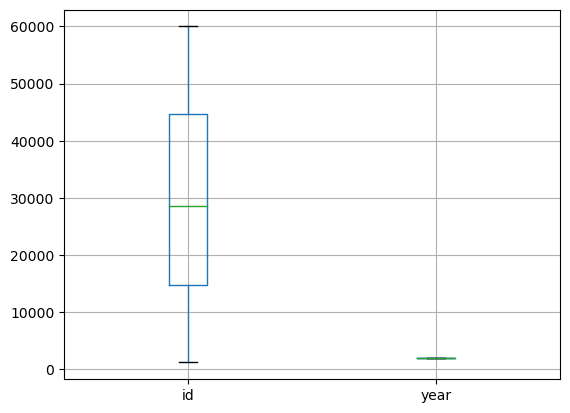

In [15]:
data.boxplot()

In [16]:
#There is not outlier in the dataset, So replacing the null values with mode.
data["year"] = data["year"].fillna(data["year"].median())

In [17]:
data.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    0
usage                 317
productDisplayName      7
dtype: int64

In [18]:
#Before we do EDA, lets separate Numerical and categorical variables for easy analysis
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour',
       'season', 'usage', 'productDisplayName'],
      dtype='object')
Numerical Variables:
['id', 'year']


# Exploratory Data Analysis(EDA)

# Univariate Analysis

In [19]:
observed = data['masterCategory'].value_counts()
observed

masterCategory
Apparel           21397
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64

In [20]:
observed = data['subCategory'].value_counts()
observed

subCategory
Topwear                     15402
Shoes                        7343
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1011
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   129
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin Care                      77
Sk

<Axes: xlabel='gender', ylabel='count'>

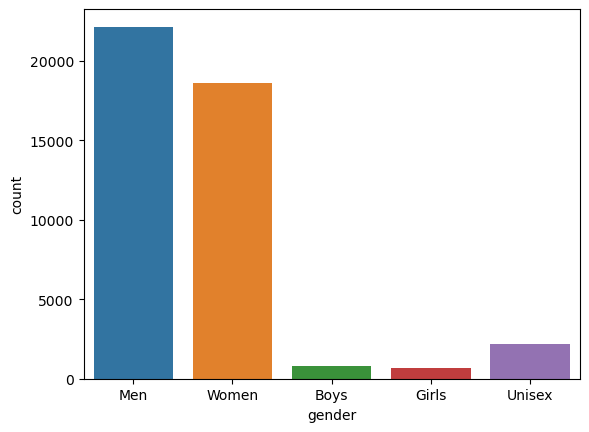

In [21]:
sns.countplot(x="gender",data=data)

In [22]:
# return the percentage of different genders
data["gender"].value_counts()/len(data)*100

gender
Men      49.85
Women    41.94
Unisex    4.86
Boys      1.87
Girls     1.47
Name: count, dtype: float64

<Axes: xlabel='masterCategory', ylabel='count'>

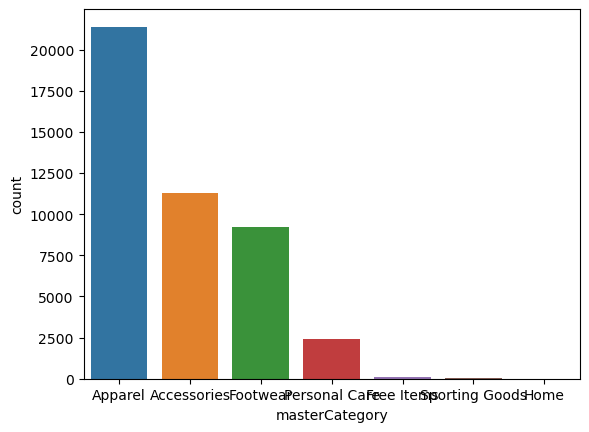

In [23]:
sns.countplot(x="masterCategory",data=data)

In [24]:
# return the percentage of different genders
data["masterCategory"].value_counts()/len(data)*10

masterCategory
Apparel          4.82
Accessories      2.54
Footwear         2.08
Personal Care    0.54
Free Items       0.02
Sporting Goods   0.01
Home             0.00
Name: count, dtype: float64

In [25]:
data.groupby(['gender']).count()

,id,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
gender,,,,,,,,,
Boys,830,830,830,830,830,830,830,830,830
Girls,655,655,655,655,655,655,655,655,655
Men,22147,22147,22147,22147,22136,22139,22147,22123,22144
Unisex,2161,2161,2161,2161,2161,2155,2161,2132,2161
Women,18631,18631,18631,18631,18627,18624,18631,18367,18627


In [26]:
data.groupby(['subCategory']).count()

,id,gender,masterCategory,articleType,baseColour,season,year,usage,productDisplayName
subCategory,,,,,,,,,
Accessories,129,129,129,129,129,129,129,129,129
Apparel Set,106,106,106,106,106,106,106,106,106
Bags,3055,3055,3055,3055,3055,3055,3055,3055,3053
Bath and Body,12,12,12,12,12,12,12,9,12
Beauty Accessories,4,4,4,4,4,4,4,3,4
Belts,811,811,811,811,811,811,811,811,811
Bottomwear,2694,2694,2694,2694,2688,2694,2694,2692,2694
Cufflinks,108,108,108,108,108,108,108,108,108
Dress,478,478,478,478,478,478,478,478,478


In [27]:
data.groupby(['usage']).count()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,productDisplayName
usage,,,,,,,,,
Casual,34406,34406,34406,34406,34406,34399,34406,34406,34404
Ethnic,3208,3208,3208,3208,3208,3208,3208,3208,3208
Formal,2345,2345,2345,2345,2345,2345,2345,2345,2345
Home,1,1,1,1,1,1,1,1,1
Party,29,29,29,29,29,29,29,29,29
Smart Casual,67,67,67,67,67,67,67,67,67
Sports,4025,4025,4025,4025,4025,4025,4004,4025,4025
Travel,26,26,26,26,26,26,26,26,26


In [28]:
data.groupby(['gender']).count()

,id,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
gender,,,,,,,,,
Boys,830,830,830,830,830,830,830,830,830
Girls,655,655,655,655,655,655,655,655,655
Men,22147,22147,22147,22147,22136,22139,22147,22123,22144
Unisex,2161,2161,2161,2161,2161,2155,2161,2132,2161
Women,18631,18631,18631,18631,18627,18624,18631,18367,18627


In [44]:
freq_table = data.groupby(['subCategory']).size().reset_index(name='Count').rename(columns={'subCategor':'subCategor'})
freq_table

,subCategory,Count
0,Accessories,129
1,Apparel Set,106
2,Bags,3055
3,Bath and Body,12
4,Beauty Accessories,4
5,Belts,811
6,Bottomwear,2694
7,Cufflinks,108
8,Dress,478
9,Eyes,43


In [45]:
freq_table = data.groupby(['articleType']).size().reset_index(name='Count').rename(columns={'articleType':'articleType'})
freq_table

,articleType,Count
0,Accessory Gift Set,97
1,Baby Dolls,16
2,Backpacks,724
3,Bangle,85
4,Basketballs,13
...,...,...
138,Waistcoat,15
139,Wallets,936
140,Watches,2542
141,Water Bottle,11


NameError: name 'freq_table' is not defined

In [47]:
#mathematical 

freq_table['Count%'] = freq_table['Count']/sum(freq_table['Count'])
freq_table

,articleType,Count,Count%
0,Accessory Gift Set,97,0.00
1,Baby Dolls,16,0.00
2,Backpacks,724,0.02
3,Bangle,85,0.00
4,Basketballs,13,0.00
...,...,...,...
138,Waistcoat,15,0.00
139,Wallets,936,0.02
140,Watches,2542,0.06
141,Water Bottle,11,0.00


# Bivariate Analysis 

In [49]:
data

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.00,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.00,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.00,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.00,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.00,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.00,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.00,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.00,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.00,Casual,Rasasi Women Blue Lady Perfume


In [52]:
# find categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 8 categorical variables

The categorical variables are : ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage', 'productDisplayName']


In [53]:
# view the categorical variables

data[categorical].head()

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
0,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual,Turtle Check Men Navy Blue Shirt
1,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Peter England Men Party Blue Jeans
2,Women,Accessories,Watches,Watches,Silver,Winter,Casual,Titan Women Silver Watch
3,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual,Manchester United Men Solid Black Track Pants
4,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual,Puma Men Grey T-shirt


In [54]:
# view frequency of categorical variables

for var in categorical: 
    
    print(data[var].value_counts())

gender
Men       22147
Women     18631
Unisex     2161
Boys        830
Girls       655
Name: count, dtype: int64
masterCategory
Apparel           21397
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64
subCategory
Topwear                     15402
Shoes                        7343
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1011
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup              

Number of labels: cardinality
The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the learning model. So, I will check for high cardinality.

In [55]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(data[var].unique()), ' labels')

gender  contains  5  labels
masterCategory  contains  7  labels
subCategory  contains  45  labels
articleType  contains  143  labels
baseColour  contains  47  labels
season  contains  5  labels
usage  contains  9  labels
productDisplayName  contains  31122  labels


In [56]:
# print categorical variables containing missing values

cat1 = [var for var in categorical if data[var].isnull().sum()!=0]

print(data[cat1].isnull().sum())

baseColour             15
season                 21
usage                 317
productDisplayName      7
dtype: int64


In [57]:
# check missing values in categorical variables

data[categorical].isnull().sum()

gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
usage                 317
productDisplayName      7
dtype: int64

We can see that baseColour season usage productDisplayName variables contain missing values. I will explore these variables one by one.

In [54]:
# Created a copy of dataframe 
df = data[['id','gender','masterCategory','subCategory','articleType','baseColour','season','usage','productDisplayName']].copy()
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,Casual,Rasasi Women Blue Lady Perfume


# Explore gender variable

In [55]:
# print number of labels in gender variable

print('gender contains', len(df.gender.unique()), 'labels')

gender contains 5 labels


In [60]:
# check labels in gender variable

df.gender.unique()

array(['Men', 'Women', 'Boys', 'Girls', 'Unisex'], dtype=object)

In [61]:
# check frequency distribution of values in gender variable

df.gender.value_counts()

gender
Men       22147
Women     18631
Unisex     2161
Boys        830
Girls       655
Name: count, dtype: int64

In [62]:
# let's do One Hot Encoding of gender variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

dummies_1 = pd.get_dummies(df["gender"])
dummies_1

,Boys,Girls,Men,Unisex,Women
0,False,False,True,False,False
1,False,False,True,False,False
2,False,False,False,False,True
3,False,False,True,False,False
4,False,False,True,False,False
...,...,...,...,...,...
44419,False,False,True,False,False
44420,False,False,True,False,False
44421,False,False,True,False,False
44422,False,False,False,False,True


In [63]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,Casual,Rasasi Women Blue Lady Perfume


# Explore masterCategory variable

In [64]:
# print number of labels in masterCategory variable

print('masterCategory contains', len(df.masterCategory.unique()), 'labels')

masterCategory contains 7 labels


In [65]:
# check labels in gender variable

df.masterCategory.unique()

array(['Apparel', 'Accessories', 'Footwear', 'Personal Care',
       'Free Items', 'Sporting Goods', 'Home'], dtype=object)

In [66]:
# check frequency distribution of values in gender variable

df.masterCategory.value_counts()

masterCategory
Apparel           21397
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64

In [75]:
# let's do One Hot Encoding of gender variable 
# preview the dataset with head() method

pd.get_dummies(df.masterCategory, dummy_na=True).head()


,Accessories,Apparel,Footwear,Free Items,Home,Personal Care,Sporting Goods,NaN
0,False,True,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False


In [74]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category
pd.get_dummies(df.masterCategory, dummy_na=True).sum(axis=0)


Accessories       11274
Apparel           21397
Footwear           9219
Free Items          105
Home                  1
Personal Care      2403
Sporting Goods       25
NaN                   0
dtype: int64

In [77]:
#.dtypes

# Explore subCategory variable

In [78]:
# print number of labels in gender variable

print('subCategory contains', len(df.subCategory.unique()), 'labels')

subCategory contains 45 labels


In [79]:
# check labels in gender variable

df.subCategory.unique()

array(['Topwear', 'Bottomwear', 'Watches', 'Socks', 'Shoes', 'Belts',
       'Flip Flops', 'Bags', 'Innerwear', 'Sandal', 'Shoe Accessories',
       'Fragrance', 'Jewellery', 'Lips', 'Saree', 'Eyewear', 'Nails',
       'Scarves', 'Dress', 'Loungewear and Nightwear', 'Wallets',
       'Apparel Set', 'Headwear', 'Mufflers', 'Skin Care', 'Makeup',
       'Free Gifts', 'Ties', 'Accessories', 'Skin', 'Beauty Accessories',
       'Water Bottle', 'Eyes', 'Bath and Body', 'Gloves',
       'Sports Accessories', 'Cufflinks', 'Sports Equipment', 'Stoles',
       'Hair', 'Perfumes', 'Home Furnishing', 'Umbrellas', 'Wristbands',
       'Vouchers'], dtype=object)

In [80]:
# check frequency distribution of values in gender variable

df.subCategory.value_counts()

subCategory
Topwear                     15402
Shoes                        7343
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1011
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   129
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin Care                      77
Sk

In [81]:
# let's do One Hot Encoding of gender variable
# preview the dataset with head() method

pd.get_dummies(df.subCategory, dummy_na=True).head()

,Accessories,Apparel Set,Bags,Bath and Body,Beauty Accessories,Belts,Bottomwear,Cufflinks,Dress,Eyes,...,Stoles,Ties,Topwear,Umbrellas,Vouchers,Wallets,Watches,Water Bottle,Wristbands,NaN
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


# Explore articleType variable

In [82]:
# print number of labels in gender variable

print('gender contains', len(df.articleType.unique()), 'labels')

gender contains 143 labels


In [73]:
# check labels in gender variable

df.articleType.unique()

array(['Shirts', 'Jeans', 'Watches', 'Track Pants', 'Tshirts', 'Socks',
       'Casual Shoes', 'Belts', 'Flip Flops', 'Handbags', 'Tops', 'Bra',
       'Sandals', 'Shoe Accessories', 'Sweatshirts', 'Deodorant',
       'Formal Shoes', 'Bracelet', 'Lipstick', 'Flats', 'Kurtas',
       'Waistcoat', 'Sports Shoes', 'Shorts', 'Briefs', 'Sarees',
       'Perfume and Body Mist', 'Heels', 'Sunglasses', 'Innerwear Vests',
       'Pendant', 'Nail Polish', 'Laptop Bag', 'Scarves', 'Rain Jacket',
       'Dresses', 'Night suits', 'Skirts', 'Wallets', 'Blazers', 'Ring',
       'Kurta Sets', 'Clutches', 'Shrug', 'Backpacks', 'Caps', 'Trousers',
       'Earrings', 'Camisoles', 'Boxers', 'Jewellery Set', 'Dupatta',
       'Capris', 'Lip Gloss', 'Bath Robe', 'Mufflers', 'Tunics',
       'Jackets', 'Trunk', 'Lounge Pants', 'Face Wash and Cleanser',
       'Necklace and Chains', 'Duffel Bag', 'Sports Sandals',
       'Foundation and Primer', 'Sweaters', 'Free Gifts', 'Trolley Bag',
       'Tracksuits', 'S

In [74]:
# check frequency distribution of values in gender variable

df.articleType.value_counts()

articleType
Tshirts                7067
Shirts                 3217
Casual Shoes           2845
Watches                2542
Sports Shoes           2036
                       ... 
Shoe Laces                1
Mens Grooming Kit         1
Body Wash and Scrub       1
Suits                     1
Ipad                      1
Name: count, Length: 143, dtype: int64

In [110]:
# let's do One Hot Encoding of gender variable
# preview the dataset with head() method

# dummies_articleType = pd.get_dummies(df.articleType)
# dummies_articleType
pd.get_dummies(df.articleType, dummy_na=True)

,Accessory Gift Set,Baby Dolls,Backpacks,Bangle,Basketballs,Bath Robe,Beauty Accessory,Belts,Blazers,Body Lotion,...,Tshirts,Tunics,Umbrellas,Waist Pouch,Waistcoat,Wallets,Watches,Water Bottle,Wristbands,NaN
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44419,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44420,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44421,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
44422,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [92]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,Men
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual,Turtle Check Men Navy Blue Shirt,True
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Peter England Men Party Blue Jeans,True
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Casual,Titan Women Silver Watch,False
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual,Manchester United Men Solid Black Track Pants,True
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual,Puma Men Grey T-shirt,True
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,Casual,Gas Men Caddy Casual Shoe,True
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,Casual,Lotto Men's Soccer Track Flip Flop,True
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,Casual,Puma Men Graphic Stellar Blue Tshirt,True
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,Casual,Rasasi Women Blue Lady Perfume,False


# Explore baseColor variable

In [76]:
# print number of labels in gender variable

print('gender contains', len(df.baseColour.unique()), 'labels')

gender contains 47 labels


In [77]:
# check labels in gender variable

df.baseColour.unique()

array(['Navy Blue', 'Blue', 'Silver', 'Black', 'Grey', 'Green', 'Purple',
       'White', 'Beige', 'Brown', 'Bronze', 'Teal', 'Copper', 'Pink',
       'Off White', 'Maroon', 'Red', 'Khaki', 'Orange', 'Coffee Brown',
       'Yellow', 'Charcoal', 'Gold', 'Steel', 'Tan', 'Multi', 'Magenta',
       'Lavender', 'Sea Green', 'Cream', 'Peach', 'Olive', 'Skin',
       'Burgundy', 'Grey Melange', 'Rust', 'Rose', 'Lime Green', 'Mauve',
       'Turquoise Blue', 'Metallic', 'Mustard', 'Taupe', 'Nude',
       'Mushroom Brown', nan, 'Fluorescent Green'], dtype=object)

In [78]:
# check frequency distribution of values in gender variable

df.baseColour.value_counts()

baseColour
Black                9728
White                5538
Blue                 4918
Brown                3494
Grey                 2741
Red                  2455
Green                2115
Pink                 1860
Navy Blue            1789
Purple               1640
Silver               1090
Yellow                778
Beige                 749
Gold                  628
Maroon                581
Orange                530
Olive                 410
Multi                 394
Cream                 390
Steel                 315
Charcoal              228
Peach                 195
Off White             182
Skin                  179
Lavender              162
Grey Melange          146
Khaki                 139
Magenta               129
Teal                  120
Tan                   114
Mustard                97
Bronze                 95
Copper                 86
Turquoise Blue         69
Rust                   66
Burgundy               45
Metallic               43
Coffee Brown           31
M

In [108]:
# let's do One Hot Encoding of gender variable 
# preview the dataset with head() method

pd.get_dummies(df.baseColour,dummy_na=True).head()

,Beige,Black,Blue,Bronze,Brown,Burgundy,Charcoal,Coffee Brown,Copper,Cream,...,Silver,Skin,Steel,Tan,Taupe,Teal,Turquoise Blue,White,Yellow,NaN
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Explore season variable

In [80]:
# print number of labels in gender variable

print('gender contains', len(df.season.unique()), 'labels')

gender contains 5 labels


In [81]:
# check labels in gender variable

df.season.unique()

array(['Fall', 'Summer', 'Winter', 'Spring', nan], dtype=object)

In [82]:
# check frequency distribution of values in gender variable

df.season.value_counts()

season
Summer    21472
Fall      11431
Winter     8517
Spring     2983
Name: count, dtype: int64

In [106]:
# let's do One Hot Encoding of gender variable
# preview the dataset with head() method

pd.get_dummies(df.season, dummy_na=True).head()

,Fall,Spring,Summer,Winter,NaN
0,True,False,False,False,False
1,False,False,True,False,False
2,False,False,False,True,False
3,True,False,False,False,False
4,False,False,True,False,False


# Explore usage variable

In [84]:
# print number of labels in gender variable

print('gender contains', len(df.usage.unique()), 'labels')

gender contains 9 labels


In [85]:
# check labels in gender variable

df.usage.unique()

array(['Casual', 'Ethnic', 'Formal', 'Sports', nan, 'Smart Casual',
       'Travel', 'Party', 'Home'], dtype=object)

In [86]:
# check frequency distribution of values in gender variable

df.usage.value_counts()

usage
Casual          34406
Sports           4025
Ethnic           3208
Formal           2345
Smart Casual       67
Party              29
Travel             26
Home                1
Name: count, dtype: int64

In [104]:
# let's do One Hot Encoding of gender variable 
# preview the dataset with head() method

pd.get_dummies(df.usage, dummy_na=True).head()

,Casual,Ethnic,Formal,Home,Party,Smart Casual,Sports,Travel,NaN
0,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False


# Multivariate Analysis

In [45]:
import cv2
def plot_figures(figures, nrows = 1, ncols=1,figsize=(14, 14)):

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout()
    
def img_path(img):
    return Path+"/images/"+img

def load_image(img, resized_fac = 0.1):
    img     = cv2.imread(img_path(img))
    w, h, _ = img.shape
    resized = cv2.resize(img, (int(h*resized_fac), int(w*resized_fac)), interpolation = cv2.INTER_AREA)
    return resized

<Axes: ylabel='articleType'>

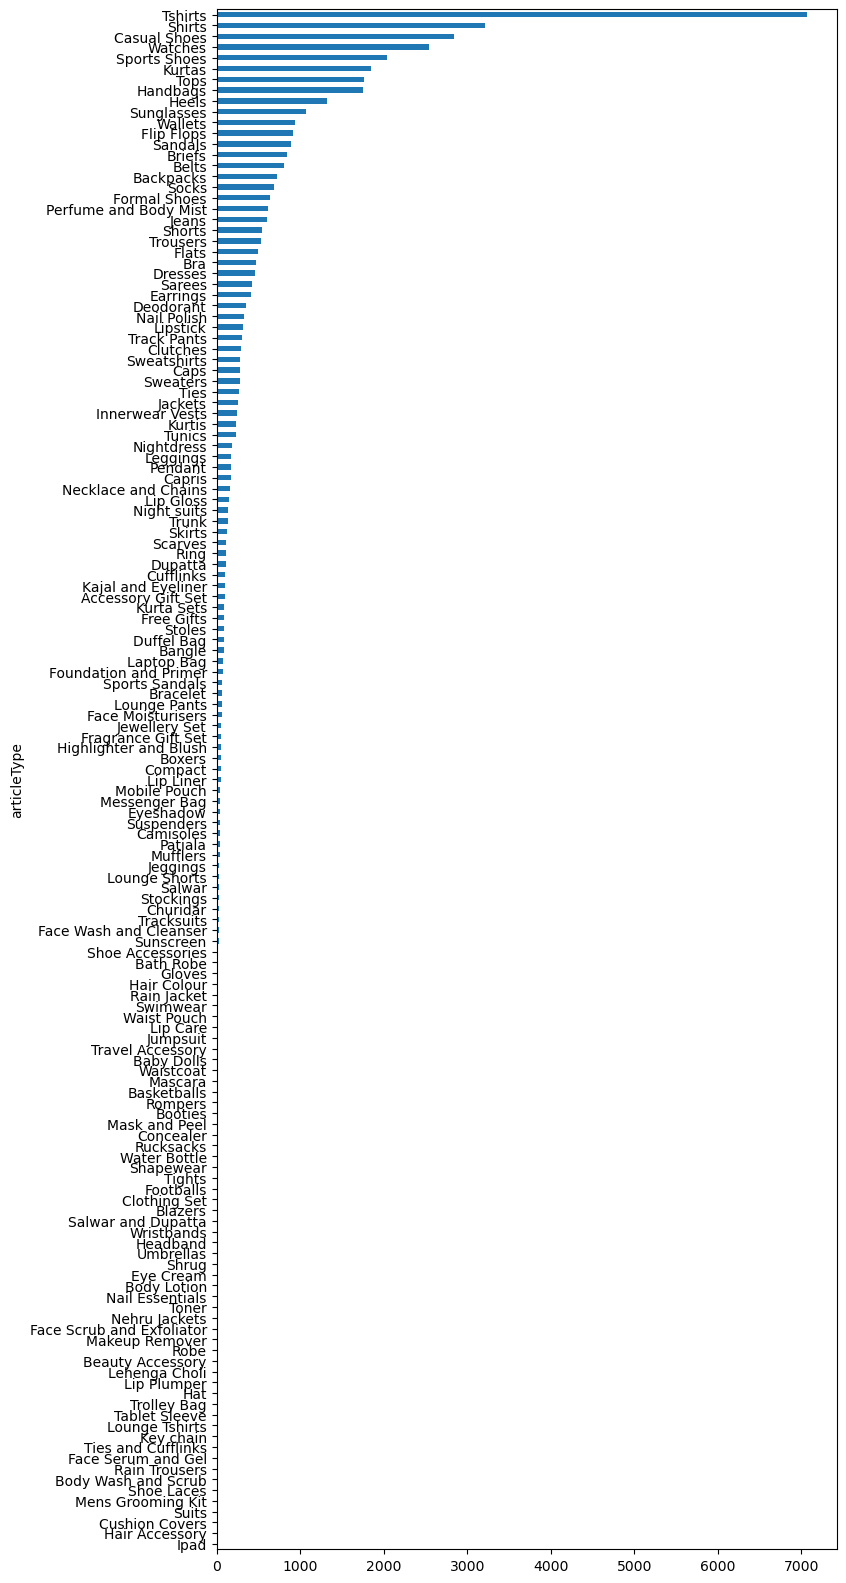

In [46]:
plt.figure(figsize=(8,20))
data.articleType.value_counts().sort_values().plot(kind='barh')

# Declare feature vector and target variable

In [83]:
X = df.drop(['productDisplayName'], axis=1)

y = df['productDisplayName']

In [84]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [85]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((35539, 8), (8885, 8))

# Feature Engineering 
Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.



In [86]:
# check data types in X_train

X_train.dtypes

id                 int64
gender            object
masterCategory    object
subCategory       object
articleType       object
baseColour        object
season            object
usage             object
dtype: object

# Engineering missing values in categorical variables 

In [124]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['gender',
 'masterCategory',
 'subCategory',
 'articleType',
 'baseColour',
 'season',
 'usage']

In [125]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

gender           0.00
masterCategory   0.00
subCategory      0.00
articleType      0.00
baseColour       0.00
season           0.00
usage            0.01
dtype: float64

In [126]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

baseColour 0.00030951911984017556
season 0.0004220715270547849
usage 0.007006387349109429


In [128]:
# impute missing categorical variables with most frequent value

for df1 in [X_train, X_test]:
    df1['baseColour'].fillna(X_train['baseColour'].mode()[0], inplace=True)
    df1['season'].fillna(X_train['season'].mode()[0], inplace=True)
    df1['usage'].fillna(X_train['usage'].mode()[0], inplace=True)
    

In [129]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

gender            0
masterCategory    0
subCategory       0
articleType       0
baseColour        0
season            0
usage             0
dtype: int64

In [130]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

gender            0
masterCategory    0
subCategory       0
articleType       0
baseColour        0
season            0
usage             0
dtype: int64

We can see that there are no missing values in X_train and X_test.

# Multivariate Analysis

# Data PreParation

In [1]:
import numpy as nр

import pandas as pd

import os

import tensorflow as tf

import tensorflow.keras as keras

from keras import Model

from keras.applications.densenet import DenseNet121

from keras.applications import vgg16 

from keras.preprocessing import image

from keras.applications.densenet import preprocess_input, decode_predictions

from keras.layers import GlobalMaxPooling2D

#from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt



import matplotlib.image as mpimg

import cv2

import pathlib
from sklearn.metrics.pairwise import linear_kernel



In [2]:
path = 'D:\\AI Stylish Project\\fashion_dataset\\'
dataset_path = pathlib.Path(path)
dirs_names = os.listdir(dataset_path) #list content of dataset
dirs_names

['images', 'styles.csv']

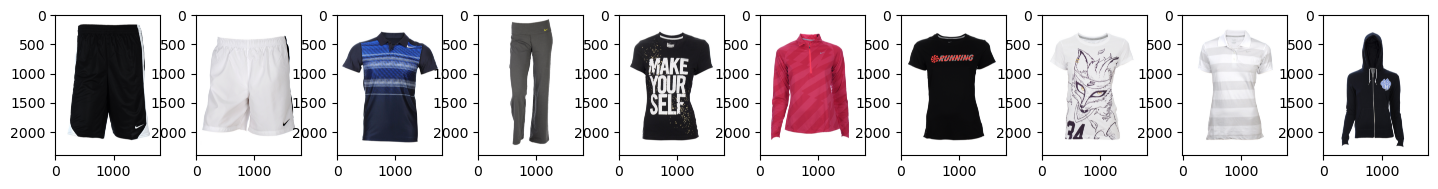

In [38]:
#plot sample
plt.figure(figsize=(20,20))
for i in range(20,30):
    plt.subplot(6, 10, i-10+1)
    cloth_img = mpimg.imread(path + 'images/100' + str(i) +'.jpg') #Assign image ids
    plt.imshow(cloth_img)
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()

In [3]:
styles_df = pd.read_csv(path + "styles.csv", nrows=10000, on_bad_lines='skip')
styles_df['image'] = styles_df.apply(lambda x: str(x['id']) + ".jpg", axis=1)
print(styles_df.shape)
styles_df.tail()


(10000, 11)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
9995,10748,Unisex,Footwear,Flip Flops,Flip Flops,Navy Blue,Winter,2012,Casual,Disney Unisex Kids Basic Navy Blue Flip Flops,10748.jpg
9996,37956,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2013,Casual,Clarks Men Black Leather Loafers,37956.jpg
9997,40038,Unisex,Accessories,Socks,Socks,White,Summer,2012,Casual,ADIDAS Unisex White Pack of 3 Socks,40038.jpg
9998,38122,Men,Apparel,Bottomwear,Trousers,Khaki,Spring,2013,Smart Casual,Allen Solly Men Khaki Chino Trousers,38122.jpg
9999,59929,Women,Apparel,Topwear,Kurtas,Multi,Summer,2012,Ethnic,Diva Women Multi Coloured Kurta,59929.jpg


# Modeling and Get Image Embeddings

In [19]:
img_width, img_height, chnls = 100, 100, 3

In [32]:
#VGG16
from tensorflow.keras.applications import VGG16

vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(img_width, img_height, chnls))
vgg16_model = keras.Sequential([vgg16, GlobalMaxPooling2D()])
vgg16_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 global_max_pooling2d_1 (Gl  (None, 512)               0         
 obalMaxPooling2D)                                               
                                                                 
Total params: 14714688 (56.13 MB)
Trainable params: 14714688 (56.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
def img_path(img):
    """ Take image name(id) and return the complete path of it """
    return path + 'images/' + img
def predict(model, img_name):
    """ Load and preprocess image then make prediction """
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width,img_height))
    #img to Array
    img = image.img_to_array(img)
    #Expand Dim (1, w, h)
    img = np.expand_dims(img, axis=0)
    #Pre Process Input
    return model.predict(img)

In [35]:
def get_embeddings(df, model):
    """ Return a data """
    df_copy = df
    df_embeddings = df_copy['image'].apply(lambda x: predict(vgg16_model, x).reshape(-1))
    df_embeddings = df_embeddings.apply(pd.Series)
    return df_embeddings
df_embeddings = get_embeddings(styles_df, vgg16_model)

NameError: name 'np' is not defined

NameError: name 'df' is not defined